In [84]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Final


In [85]:
num_experiments: Final[int] = 100
bins: Final[int] = 5

Модель Рикера


In [86]:
a: Final[int] = 300
b: Final[int] = 1
n: Final[int] = 1000
c: Final[float] = 1 / 48
x_0: Final[float] = 1.01

In [87]:
x = np.zeros(n)
x[0] = x_0
for i in range(1, n):
    x[i] = a * x[i - 1] * np.exp(-b * x[i - 1])

assert np.all(x <= a / (b * np.e))


In [88]:
x_ln = np.zeros(n)
x_ln[0] = np.log(x[0])
for i in range(1, n):
    x_ln[i] = x_ln[i - 1] + np.log(a) - b * x[i - 1]

In [89]:
b_list = np.zeros(num_experiments)
a_list = np.zeros(num_experiments)


for i in range(num_experiments):
    epsilon = np.random.normal(loc=0, scale=np.sqrt(c), size=n)
    # epsilon.sort()

    y = x * np.exp(epsilon)

    b_line = (
        2
        * np.exp(c / 2)
        * ((y * np.log(y)).mean() - c * y.mean() - y.mean() * np.log(y).mean())
        / ((y**2).mean() * np.exp(-c) - y.mean() ** 2)
    )
    b_list[i] = b_line

    a_line = np.exp(b_line * y.mean() * np.exp(-c / 2))

    a_list[i] = a_line


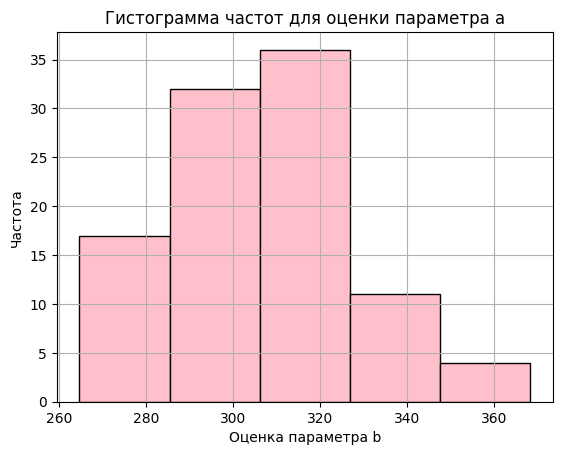

Интервал		Частота
[264.6611, 285.3794)	17
[285.3794, 306.0977)	32
[306.0977, 326.8159)	36
[326.8159, 347.5342)	11
[347.5342, 368.2524)	4


In [90]:
plt.hist(a_list, bins=bins, edgecolor="black", color="pink")
plt.title("Гистограмма частот для оценки параметра a")
plt.xlabel("Оценка параметра b")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


hist, bin_edges = np.histogram(a_list, bins=bins)

print("Интервал\t\tЧастота")
for i in range(bins):
    print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")

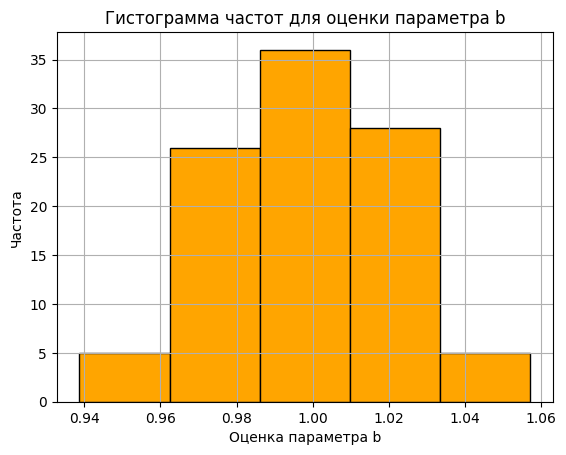

Интервал		Частота
[0.9387, 0.9624)	5
[0.9624, 0.9861)	26
[0.9861, 1.0098)	36
[1.0098, 1.0335)	28
[1.0335, 1.0572)	5


In [91]:
plt.hist(b_list, bins=bins, edgecolor="black", color="orange")
plt.title("Гистограмма частот для оценки параметра b")
plt.xlabel("Оценка параметра b")
plt.ylabel("Частота")
plt.grid(True)
plt.show()


hist, bin_edges = np.histogram(b_list, bins=bins)

print("Интервал\t\tЧастота")
for i in range(bins):
    print(f"[{bin_edges[i]:.4f}, {bin_edges[i + 1]:.4f})\t{hist[i]}")